<a href="https://www.kaggle.com/code/pathompongmuangthong/suicide-rate-visualization?scriptVersionId=114187716" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import re

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/suicide-rate-and-life-expectancy/Life expectancy.csv
/kaggle/input/suicide-rate-and-life-expectancy/Suicide Rate.csv


**GDP per capita** is a measure of the economic output of a country or region that is calculated by dividing the Gross Domestic Product (GDP) by the total population of the area. It is often used as an indicator of the standard of living in a particular country or region, as it reflects the average income per person in the area. GDP per capita is usually calculated on a yearly basis and is expressed in monetary terms. It is often used to compare the economic performance of different countries or regions, as well as to track changes in the standard of living over time within a particular area.

# Load Dataset and Quick Lookup :D

In [2]:
dfSuicide = pd.read_csv('/kaggle/input/suicide-rate-and-life-expectancy/Suicide Rate.csv')

In [3]:
dfSuicide.head()

,Country,GDP per capita,Suicide rate
0,Afghanistan,"1,105",20.6
1,Albania,"4,932",32.4
2,Algeria,"4,534",15.6
3,Andorra,"46,622",18.9
4,Angola,"2,077",20.5


In [4]:
dfSuicide['Country'].nunique()

140

In [5]:
dfSuicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         140 non-null    object 
 1   GDP per capita  140 non-null    object 
 2   Suicide rate    140 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.4+ KB


# Data Preprocessing

## Change Type

In [6]:
dfSuicide['GDP per capita'] = dfSuicide['GDP per capita'].apply(lambda x: (x.replace(',',''))).astype(int)

## Get countries code

In [7]:
# get country code for plot graph
import pycountry
mapping = {country.name: country.alpha_3 for country in pycountry.countries}

# fix some countries name
dfSuicide = dfSuicide.replace(['Bolivia', 'Cape Verde', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Czech Republic', 'Iran', 'Laos', 'Macedonia', 'Micronesia, Fed. Sts.', 'Moldova'],
                              ['Bolivia, Plurinational State of', 'Cabo Verde', 'Congo, The Democratic Republic of the', 'Congo', "Côte d'Ivoire", 'Czechia', 'Iran, Islamic Republic of', "Lao People's Democratic Republic", 'North Macedonia', 'Micronesia, Federated States of', 'Moldova, Republic of'])

dfSuicide['country_code'] = dfSuicide['Country'].apply(lambda x: mapping.get(x))

In [8]:
dfSuicide

,Country,GDP per capita,Suicide rate,country_code
0,Afghanistan,1105,20.6,AFG
1,Albania,4932,32.4,ALB
2,Algeria,4534,15.6,DZA
3,Andorra,46622,18.9,AND
4,Angola,2077,20.5,AGO
...,...,...,...,...
135,Spain,29542,11.5,ESP
136,Switzerland,83832,12.9,CHE
137,United Kingdom,39720,11.1,GBR
138,United States,65112,14.0,USA


# Top 10 Most Suicide Rate Countries (Bar Chart)
1. Armenia
1. Latvia
1. Albania
1. Mongolia
1. Belarus
1. Moldova
1. Georgia
1. Bosnia and Herzegovina
1. Thailand
1. Lithuania

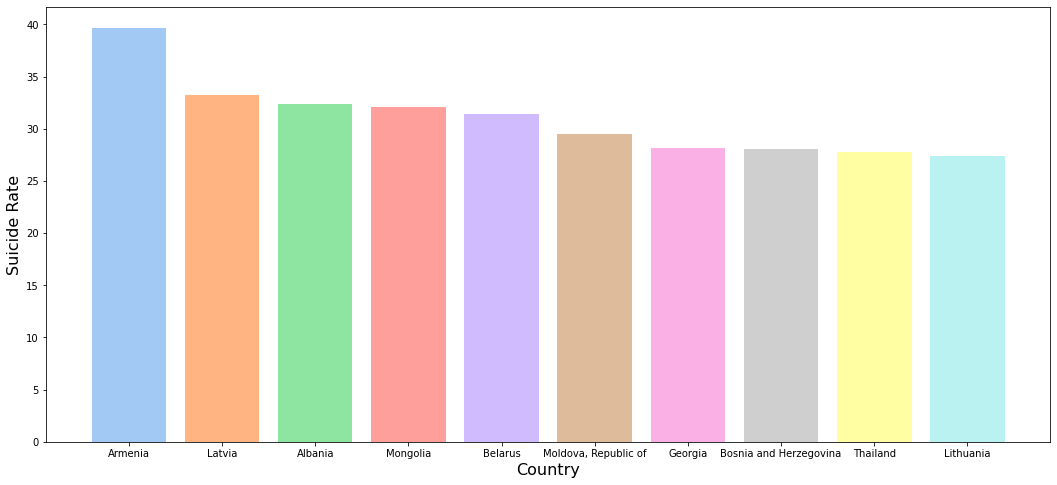

In [9]:
# plot bar chart
dfPlot = dfSuicide.sort_values(by='Suicide rate', ascending=False).head(10)
colors = sb.color_palette('pastel')[0:10]
plt.figure(figsize=(18, 8))
plt.bar(dfPlot['Country'], dfPlot['Suicide rate'], color=colors, width=0.8)
plt.xlabel('Country',  fontsize=16)
plt.ylabel('Suicide Rate',  fontsize=16)

plt.show()

## Global map of Suicide rate

In [10]:
dfPlot = dfSuicide.sort_values(by='Suicide rate', ascending=False)
fig = px.choropleth(dfPlot, locations='country_code', color='Suicide rate',
                           hover_name='Country')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Correlation betwenn 'GDP per capita' and 'Suicide rate' ( Heatmap and Scatter Plot)
* From the correlation plot show that The 'GDP per capita' tends to be ***inversely*** proportional to the 'suicide rate'
* Which mean that the countries with high GDP per capita tends to have lower suicide rate than the countries with low GDP per capita.

<AxesSubplot:>

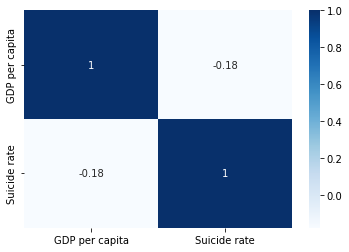

In [11]:
corr = dfSuicide.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

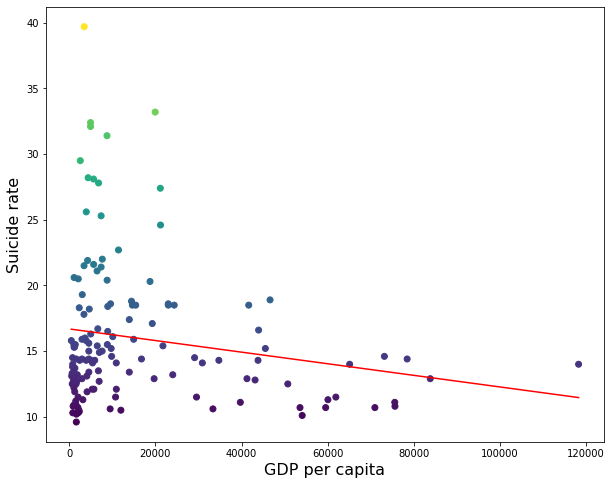

In [12]:
y = dfSuicide['Suicide rate']
x = dfSuicide['GDP per capita']

# Fit a polynomial regression model to the data
coefficients = np.polyfit(x, y, 1)  # Linear regression

# Generate a range of x-values to plot the trend line
x_trend = np.linspace(x.min(), x.max(), 100)

# Calculate the y-values for the trend line
y_trend = np.polyval(coefficients, x_trend)

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=dfSuicide['Suicide rate'])

# Add the trend line to the plot
plt.plot(x_trend, y_trend, 'r')

# Show the plot
plt.xlabel('GDP per capita',  fontsize=16)
plt.ylabel('Suicide rate',  fontsize=16)

plt.show()

In [13]:
# combined with life dataset
dfLifeExp = pd.read_csv('/kaggle/input/suicide-rate-and-life-expectancy/Life expectancy.csv')
df = dfSuicide.merge(dfLifeExp, on='Country')

In [14]:
df.head()

,Country,GDP per capita,Suicide rate,country_code,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,1105,20.6,AFG,60.6,68.2,3.794,4.7
1,Albania,4932,32.4,ALB,74.8,81.3,4.959,1.7
2,Algeria,4534,15.6,DZA,73.3,78.9,5.605,2.9
3,Andorra,46622,18.9,AND,81.7,84.8,6.955,1.4
4,Angola,2077,20.5,AGO,58.1,65.6,4.105,5.3


# Overall correlation with *suicide rate dataset* and *life expectancy dataset*
* Suicide rate is tends to ***inversely*** with Fertility Rate and GDP per capita.
* The high GDP per capita is ***correlate*** with Happiness Score and Life Expectancy in both men and women (as it should be =D)
* Woman in countries with high Happiness Score having low Fertility Rate

<AxesSubplot:>

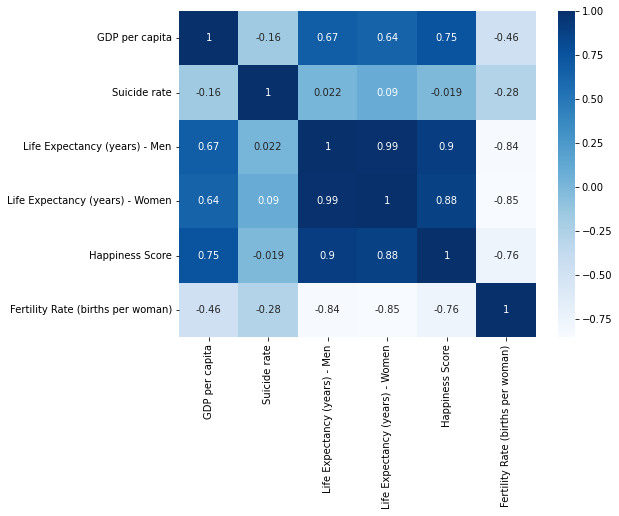

In [15]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(corr, cmap="Blues", annot=True)

# Top 10 Most Happiness Countries🥳
Congratulations to these countries I hope to live there🥲
1. Finland
1. Canada
1. Denmark
1. Norway
1. Iceland
1. Netherland
1. Israel
1. Austria
1. Belgium
1. Australia

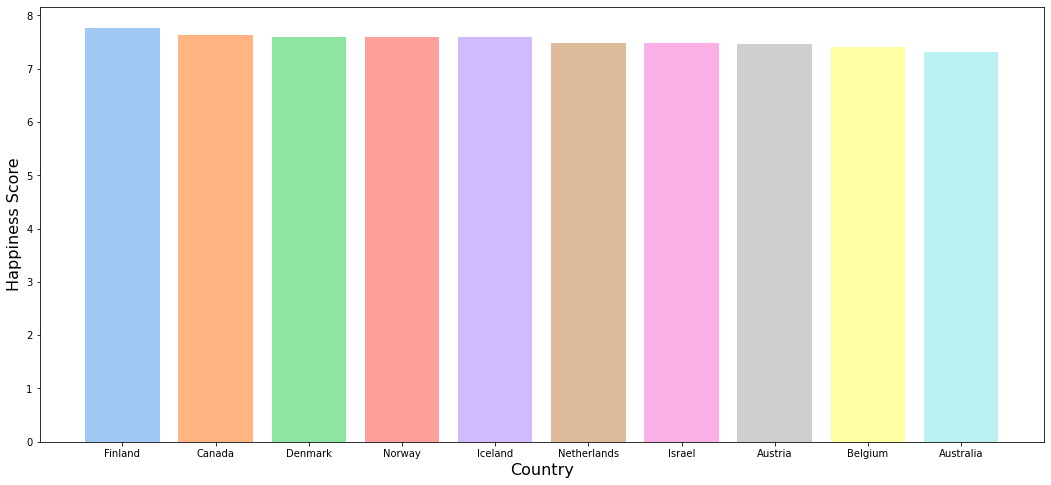

In [16]:
# plot bar chart
dfPlot = df.sort_values(by='Happiness Score', ascending=False).head(10)
colors = sb.color_palette('pastel')[0:10]
plt.figure(figsize=(18, 8))
plt.bar(dfPlot['Country'], dfPlot['Happiness Score'], color=colors, width=0.8)
plt.xlabel('Country',  fontsize=16)
plt.ylabel('Happiness Score',  fontsize=16)

plt.show()

## Global map of Happiness Score

In [17]:
dfPlot = df.sort_values(by='Happiness Score', ascending=False)
fig = px.choropleth(dfPlot, locations='country_code', color='Happiness Score',
                           hover_name='Country')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [18]:
# ;ppp